In [ ]:
import matplotlib.pyplot as plt
import csv

In [17]:


def read_csv_file(file_path):
    rows = []
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Read the header row
        for row in csv_reader:
            rows.append(row)
    return header, rows

In [18]:
# Call the function to read the CSV file and get the rows in a list
goal_featurepoints, servoing_steps = read_csv_file("servoing_csv/keypoints_servoing_x_005.csv")

goal_featurepoints = goal_featurepoints[0]
goal_featurepoints = eval(goal_featurepoints)

In [19]:
# make a list with 64 lists in it
pixel_error = []
for i in range(len(goal_featurepoints)):
    pixel_error.append([])


In [20]:
for row in servoing_steps:
    featurepoints = row[0]
    featurepoints = eval(featurepoints)

    for i in range(len(featurepoints)):
        pixel_error_x = goal_featurepoints[i][0]-featurepoints[i][0]
        pixel_error_y = goal_featurepoints[i][1]-featurepoints[i][1]
        pixel_error[i].append([pixel_error_x, pixel_error_y])

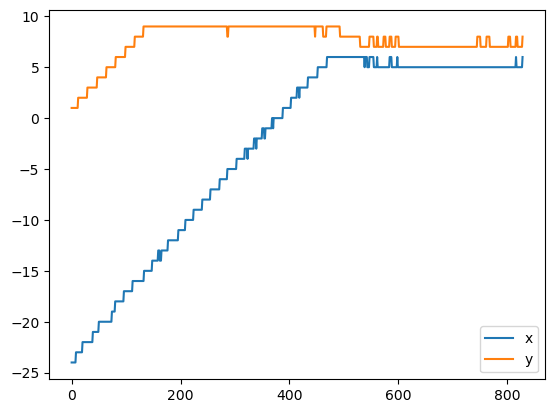

In [23]:

keypoint_number = 0 # starts with 0

plt.plot(pixel_error[n])
#plt.plot(error_keypoint_2)
plt.legend(['x', 'y'], loc='lower right')
